#  <font color='black'>The Sharpe Ratio</font> 


<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="130" src="https://prabook.com/web/show-photo.jpg?id=11262&cache=false"></p>
The Sharpe ratio was developed by Nobel laureate William F. Sharpe, and is used to help investors understand the return of an investment compared to its risk. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.Let's calculating it for the stocks of the two tech giants Aplle and Microsoft. As a benchmark, we'll use the S&P 500 that measures the performance of the 500 largest stocks in the US.

#  <font color='black'>Introduction</font> 
This notebook includes 3 chapters. In the first chapter we will import financial data and we will do some plot with the same.
In the second chapter we will build from scratch the Sarpe Ratio for the year 2018 and and finally in the third chapter we will construct a function to quickly calculate the sharpe index for n years.

# 1) Get Financial data and do some plot

<b font color='black' >Importing modules and loading data</b>

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline
import pandas_datareader as web #We will use this to get financial data from yahoo


We will set the Start Date and end date. In this first step we want to calculate the sharpe ratio for the year 2018.

In [7]:
start_date=dt.date(2018, 1, 1)
end_date=dt.date(2018, 12, 31)

In [8]:
Apple=web.DataReader('AAPl','yahoo',start_date,end_date)
MSFT=web.DataReader('MSFT','yahoo',start_date,end_date)
sep500=web.DataReader('^GSPC','yahoo',start_date,end_date)

In [9]:
Apple.info()
Apple.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,190.994104,187.183506,189.096056,189.053427,3.401588e+07,187.788261
std,20.585021,20.439982,20.493063,20.593861,1.462618e+07,20.881887
min,151.550003,146.589996,148.149994,146.830002,1.251390e+07,146.830002
25%,174.949997,172.020004,173.425003,173.139999,2.353500e+07,171.513214
50%,187.399994,184.940002,186.289993,186.050003,3.166310e+07,185.013336
75%,209.375000,205.784996,207.320000,207.760002,4.075310e+07,206.783493
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


We can see that the Data for each Stock/Index are composed by High, Low, Open, and Close Price  Volume and Adj Close informations for each trading day. For the purpose of this notebook we just need Adjusted Close price because it includes any distributions and corporate actions that occurred at any time before the next day's open.

In [10]:
both=pd.DataFrame({'Apple':Apple['Adj Close'],'Microsoft':MSFT['Adj Close']})
bench=sep500['Adj Close']

Let's now look at some graph to see how these stocks and the index have performed last year!

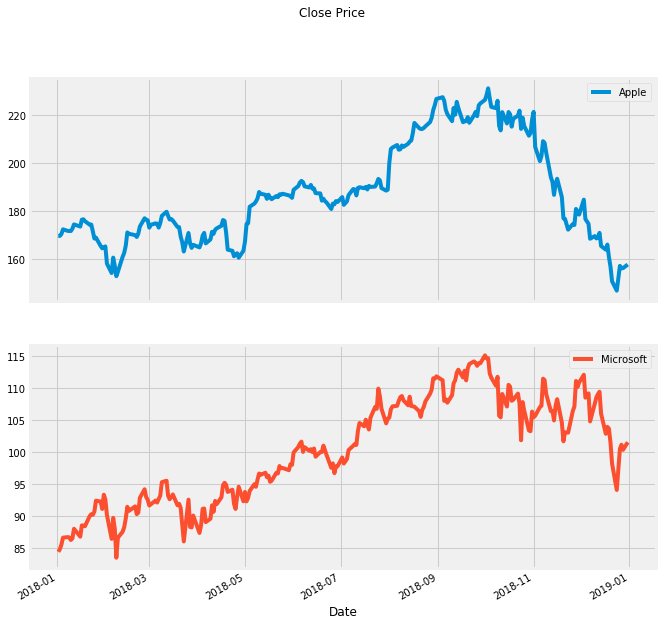

In [11]:
both.plot(title='Close Price',subplots=True,figsize=[10,10],label=['APPle','Microsoft'])
plt.show()

Let's take a look at our index too

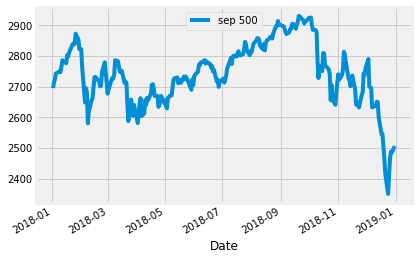

In [12]:
bench.plot(label='sep 500')
plt.legend(loc='upper center')
plt.show()

# 2)<font color='black'> Calculate the sharpe ratio.</font>

<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.</p>
<p>However, our data show the historical adjusted closing price for each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next.

In [13]:
#Calculate the perchentage change
stocks_pct=both.pct_change().dropna()
bench_pct=bench.pct_change().dropna()

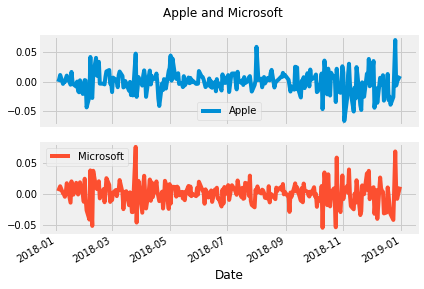

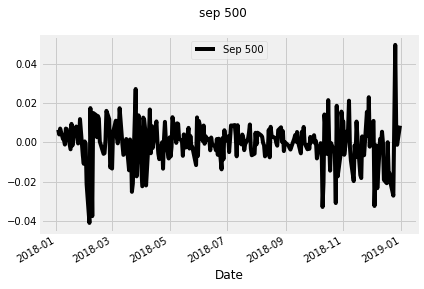

In [14]:
stocks_pct.plot(subplots=True,title='Apple and Microsoft')
plt.show()
bench_pct.plot(subplots=True,title='sep 500',color='K',label='Sep 500')
plt.legend(loc='upper center')
plt.show()

Now, we need to calculate the relative performance of each stocks vs. the S&P 500 benchmark. 
This is calculated as the difference in returns between stock_returns and sp_returns for each day.

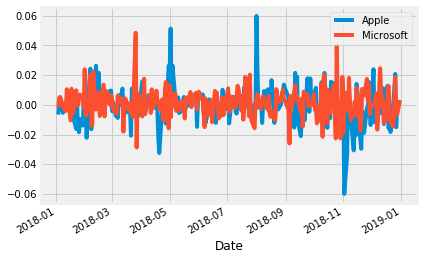

In [15]:
excess_returns = stocks_pct.sub(bench_pct , axis=0)
excess_returns.plot()
plt.show()

<b font color='black'> Computing the Sharpe Ratio</font>

<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

 <b font color='black'>Average of the excess_returns</font> 

In [16]:
avg_excess_return = excess_returns.mean()

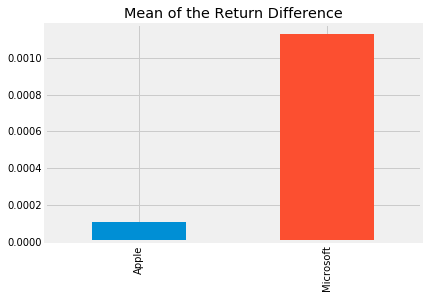

In [17]:
avg_excess_return.plot.bar(title='Mean of the Return Difference')
plt.show()

It looks like there was a lot of difference between average daily returns for Apple and Microsoft.
Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

  <b font color='black'>Standard deviation of the excess_returns</font> 

In [18]:
sd_excess_return = excess_returns.std()

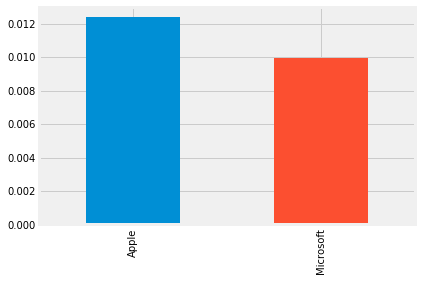

In [21]:
sd_excess_return.plot.bar()
plt.show()

As we can se from the graph above the standard deviation for the two is almost the same. 
Apple has higher standard deviation it means that it's a bit more risky.

#  <font color='black'>Sharpe Ratio</font> 

Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days 251



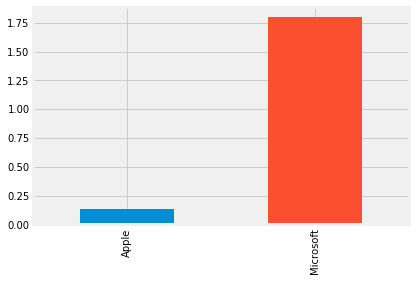

In [22]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(251)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio

annual_sharpe_ratio.plot.bar()
plt.show()

In 2018, Microsoft had a Sharpe ratio 7 time as high as Apple. 

Let's now write a code to calculate sharpe ratio for n years

# 3)<font color='black'> Calculate the sharpe ratio for n year.</font>

In [23]:
def sharpe_ratio(stock,benchmark):    
    global annual_sharpe_ratio
    stocks=stock.pct_change().dropna()
    benchmark_pct=benchmark.pct_change().dropna()
    excess_returns = stocks.subtract(benchmark_pct, axis='index')
    avg_excess_return = excess_returns.mean()
    sd_excess_return = excess_returns.std()
    daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
    annual_factor = np.sqrt(len(stocks))
    annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
    annual_sharpe_ratio=list(annual_sharpe_ratio)
    return annual_sharpe_ratio;
    

In [24]:
Ap=[]
mi=[]
ye=[]
start_from=2009
number_of_year=10
for x in range(number_of_year):
    start=dt.date(start_from+x, 1, 1)    
    end=dt.date(start_from+x, 12, 31)
    Apple=web.DataReader('AAPl','yahoo',start,end).dropna()
    MSFT=web.DataReader('MSFT','yahoo',start,end).dropna()
    both=pd.DataFrame({'Apple':Apple['Adj Close'],'Microsoft':MSFT['Adj Close']})
    sep500=web.DataReader('^GSPC','yahoo',start,end)
    bench=sep500['Adj Close']
    sharpe_ratio(both,bench)    
    Ap.append(annual_sharpe_ratio[0])
    mi.append(annual_sharpe_ratio[1])
    ye.append(start_from+x)

In [25]:
sharp_ratios=pd.DataFrame({'Date':ye,'Apple':Ap,'Microsoft':mi})

<b font color='black'>This table shows the yearly Sharp Ratio for both stocks </font>

In [26]:
sharp_ratios

,Date,Apple,Microsoft
0,2009,2.840551,0.992325
1,2010,1.725685,-1.183511
2,2011,1.121205,-0.257825
3,2012,0.979927,-0.473512
4,2013,0.009380,0.541316
5,2014,1.636948,0.931338
6,2015,0.047332,1.112739
7,2016,0.151292,0.390445
8,2017,1.555864,1.438119
9,2018,0.132451,1.794182


<b font color='black'> Plot the results</font>

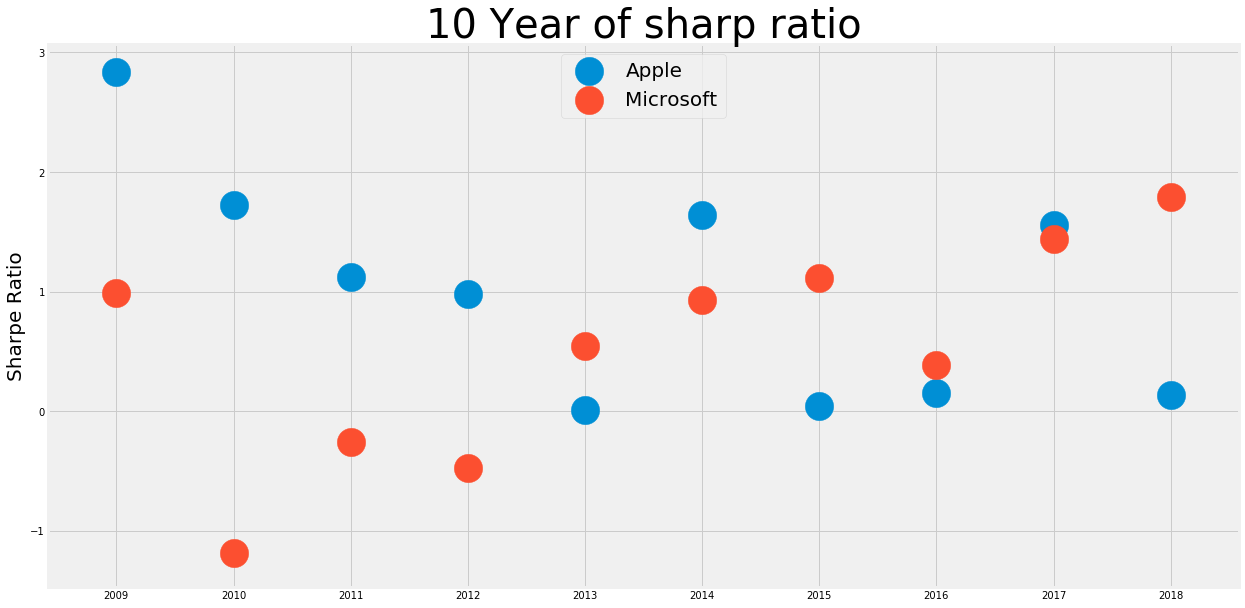

In [29]:
fig = plt.figure(figsize=(19,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x=sharp_ratios['Date'],y=sharp_ratios['Apple'],s=800,label='Apple')
ax1.scatter(x=sharp_ratios['Date'],y=sharp_ratios['Microsoft'],s=800, label='Microsoft')
ax1.set_xticks(sharp_ratios['Date'])
ax1.set_title('10 Year of sharp ratio',fontsize=40)
plt.ylabel('Sharpe Ratio',fontsize=20)
plt.legend(loc='upper center',fontsize=20);
plt.show()

In the graph above we can see how the yearly sharpe ratio for apple and Microsoft has changed in the latest 10 years.

# 3)<font color='black'> Conclusion.</font>

Given the two Sharpe ratios, which investment should we go for? 
In 2018, Microsoft had a Sharpe ratio 7 time as high as Apple. This means that an investment in Microsoft returned 7 time as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Microsoft would have been more attractive.

This difference was mostly driven by differences in return rather than risk between Apple and Microsoft. The risk of choosing Apple over Microsoft (as measured by the standard deviation) was also slightly higher so that the higher Sharpe ratio for Microsoft ends up higher mainly due to the higher average daily returns for Microsoft.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.
